# Problemas 45 y 46
## 45)
Integraremos una partícula que se mueve bajo un potencial Kepleriano: <br>
### <center> $\phi (r) = \frac{-GM}{r}$ </center>
Con excentricidad $e = 0.9$. Como queremos trabajar en coordenadas cartesianas y no en elementos orbitales, transformemos (ecuaciones extraídas del *Murray*). <br>
Si comenzamos la integración en el perihelio, $f = 0$º, y a $t = 0$ tenemos: <br>
### <center> $\vec r_0 = (a(1-e),0)$ ; $\vec v_0 = (0,\sqrt{\frac{1+e}{1-e}})$ ; $M_{\odot} \gg M_{T}$ ; $a = 1 UA$ </center>
Como no sabemos qué unidades físicas asignar a este sistema, aprovechemos los anteriores ejercicios y supondremos que el sistema es el **Tierra-Sol**. <br>
Luego, dibujaremos la trayectoria y la variación de la energía del sistema para integradores **LF** y **R-K**. Veamos:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

G = 6.67408e-11 # m^3 kg^-1 seg^-2
G = G/(1000**3) # km^3 kg^-1 seg^-2

M = 1.991e+30 # Masa del Sol, en kg
M_t = 5.97e+24 #Masa de la Tierra, en kg (La voy a considerar despreciable para las otras cuentitas de la v0, sólo para energía)
A = 1.5e+8 #semieje de la elipse (ex-distancia Tierra - Sol), en km ("a" ya lo usé en la func de la aceleración pls)
t = 100 #tiempo de integración total, en años
t = t*3.154e+7 #segundos
e = 0.9 #excentricidad del problema inventado

In [2]:
#Copiamos y pegamos del P37:

#Qué necesito: acc = -grad pot ; posc inic = (r0,0) kms (Mov 2D por F central) ; vel inic = (0,v0) km/s ; 
#step = tiempo de integ * 10 ^-i (i = {4,5,6,7,8}) ; cant de steps n = t/step = 10^i ; Energía = E(t,r,v^2)

#Calculemos v0 y E0 (t = 0 => f = 0 => M_t se encuentra en el pericentro):

v0 = np.sqrt(G*M/A)*np.sqrt((1+e)/(1-e)) #km/s
E0 = M_t*(v0**2)/2 - G*M/(A*(1-e)) #Valor de la Energía en t = 0

n = int(1e+6)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = A*(1-e) #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

def a(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M* np.array([x*(r**(-3)),y*(r**(-3))])
    return a

#Y escribamos el integrador, que va a ser el LF KDK porque sabemos que es re bien comportado para el caso P2C:

def LF(a=a,x=x,y=y,vx=0,vy=v0,n=n): #(x,y) listas vacías excepto por las pos inic, (vx,vy) variables, pero comenzamos con las v inic.
                                # a = (ax,ay) func para obtener la aceleración.
    
    for i in range(n-1): #porque uso un i+1 (al últ paso no lo quiero seguir evolucioando)
        kx = vx + a(x[i],y[i])[0]*h/2
        ky = vy + a(x[i],y[i])[1]*h/2
        
        x[i+1] = x[i] + kx*h
        y[i+1] = y[i] + ky*h
        
        vx = kx + a(x[i+1],y[i+1])[0]*h/2
        vy = ky + a(x[i+1],y[i+1])[1]*h/2
        
        v = np.sqrt(vx**2 + vy**2)
        r = np.sqrt(x[i+1]**2 + y[i+1]**2)
        
        dE[i+1] = (M_t*(v**2)/2 - G*M/r - E0)/E0 #Error relativo de la energía
        
    return x,y,dE

In [3]:
P = LF()

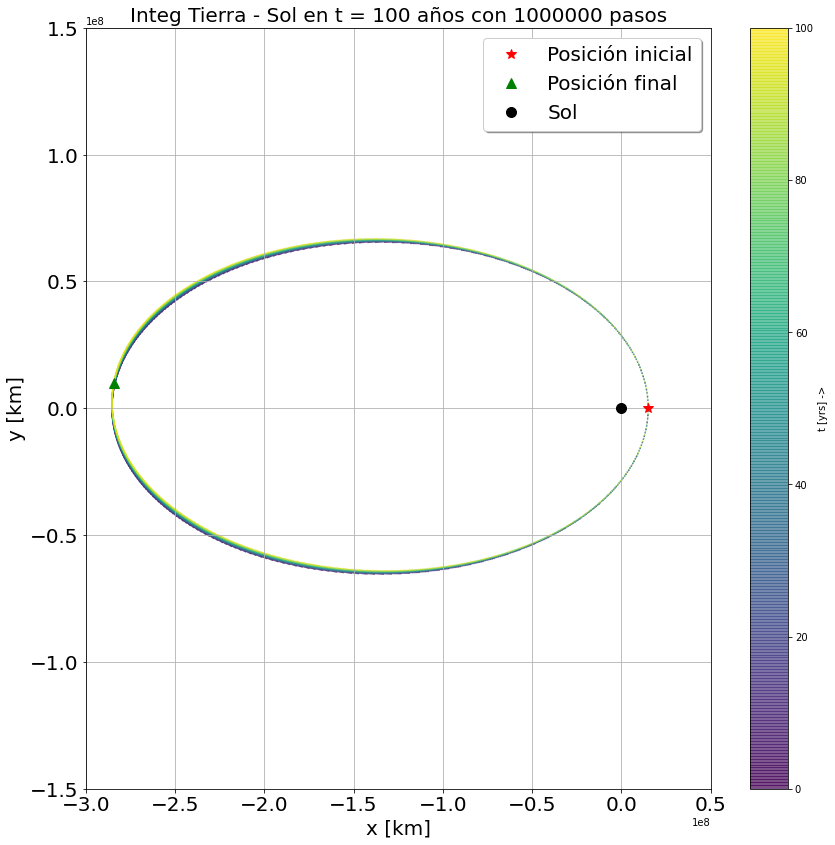

In [4]:
t = np.linspace(0,100,n//100)

plt.figure(figsize=(14,14))
plt.xlabel('x [km]',fontsize=20)
plt.ylabel('y [km]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-3e+8,0.5e+8)
plt.ylim(-1.5e+8,1.5e+8)
plt.title(f'Integ Tierra - Sol en t = 100 años con {n} pasos',fontsize=20)
orb = plt.scatter([P[0][100*i] for i in range(int(n/100))],[P[1][100*i] for i in range(int(n/100))],marker='.',s=1,alpha=0.7,c=t)
plt.colorbar(orb,ticks=None,label='t [yrs] ->')
#Lo pusimos así como para sólo plottear cada 100 steps
plt.plot(x[0],y[0],'*r',markersize=10,label='Posición inicial')
plt.plot(P[0][-1],P[1][-1],'^g',markersize=10,label='Posición final')
plt.plot(0,0,'ok',markersize=10,label='Sol')
plt.legend(shadow=True,fontsize=20)
plt.grid(True)

Notamos un ligero *drift* de la órbita. Veamos la energía:

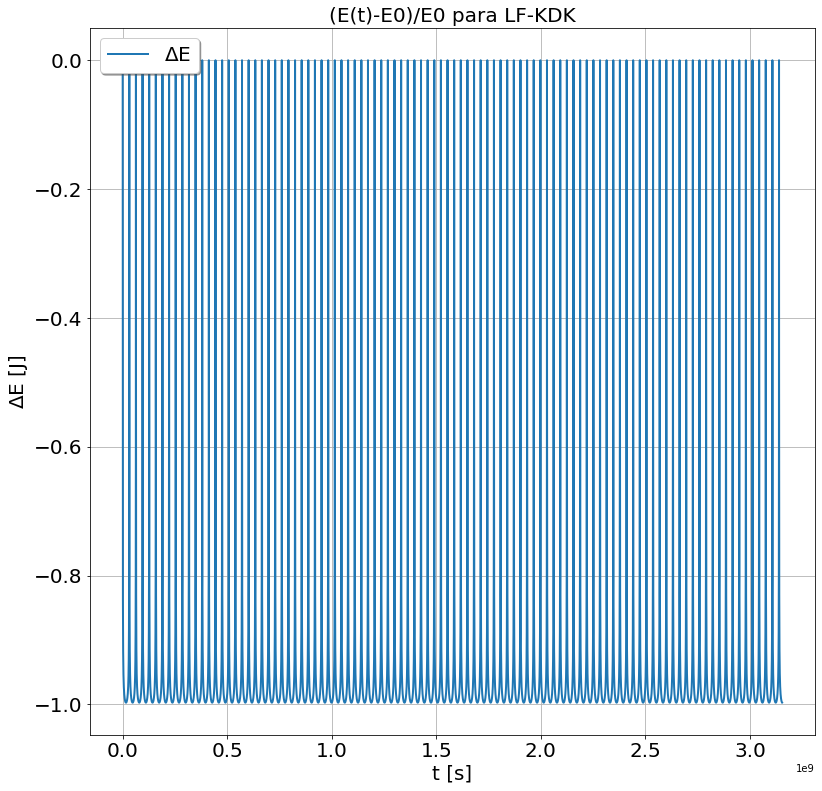

In [5]:
plt.figure(figsize=(13,13))
plt.xlabel('t [s]',fontsize=20)
plt.ylabel('$\Delta$E [J]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('(E(t)-E0)/E0 para LF-KDK',fontsize=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E',lw=2)
plt.legend(shadow=True,fontsize=20)
plt.grid(True)

**Repitamos, pero aplicando R-K:**

In [6]:
t = 100 #tiempo de integración total, en años
t = t*3.154e+7 #segundos

v0 = np.sqrt(G*M/A)*np.sqrt((1+e)/(1-e)) #km/s
E0 = M_t*(v0**2)/2 - G*M/(A*(1-e)) #Valor de la Energía en t = 0

#step y n (lo podríamos poner dentro de una func...):

n = int(1e+6)
h = t/n

#Luego, necesito las velocidades para la energía (me interesa qué pasa con DeltaEnrg). Declaro:

x = np.empty(n)
y = np.empty(n)
dE = np.empty(n)

#En nuestro caso:
x[0] = A*(1-e) #km
y[0] = 0
dE[0] = 0 #en t = 0, E(t) = E0

def a(x,y):
    r = np.sqrt(x**2 + y**2)
    a = -G*M* np.array([x*(r**(-3)),y*(r**(-3))])
    return a

def RK4(a,x,y,n,h,vx=0.0,vy=v0): #"Vectorialmente" Y' = F, con Y' = (x',v') = (v,a(x)) = F. Luego, apliquemos R-K de 4º orden
                                 #Después de mucho buscar, vemos que no debemos hacer los 4 "k_i" para v y luego para x, sino que
                                 #hay que ir hacioendo intercalado...
            
                                 #k_i para x serán "q_i" y para v "p_i":
    
    for i in range(n-1): #porque uso un i+1 (al últ paso no lo quiero seguir evolucioando)
        
        p1x = a(x[i],y[i])[0]
        p1y = a(x[i],y[i])[1]
        
        q1x = vx
        q1y = vy
        
        p2x = a(x[i]+q1x*h*0.5,y[i]+q1y*h*0.5)[0]
        p2y = a(x[i]+q1x*h*0.5,y[i]+q1y*h*0.5)[1]
        
        q2x = vx+p1x*h*0.5
        q2y = vy+p1y*h*0.5

        p3x = a(x[i]+q2x*h*0.5,y[i]+q2y*h*0.5)[0]
        p3y = a(x[i]+q2x*h*0.5,y[i]+q2y*h*0.5)[1]
        
        q3x = vx+p2x*h*0.5
        q3y = vy+p2y*h*0.5
        
        p4x = a(x[i]+q3x*h,y[i]+q3y*h)[0]
        p4y = a(x[i]+q3x*h,y[i]+q3y*h)[1]
        
        q4x = vx+p3x*h
        q4y = vy+p3y*h
        
        vx = vx + (h/6)*(p1x+2*p2x+2*p3x+p4x)
        vy = vy + (h/6)*(p1y+2*p2y+2*p3y+p4y)
        
        x[i+1] = x[i] + (h/6)*(q1x+2*q2x+2*q3x+q4x)
        y[i+1] = y[i] + (h/6)*(q1y+2*q2y+2*q3y+q4y)
        
        
        v = np.sqrt(vx**2 + vy**2)
        r = np.sqrt(x[i+1]**2 + y[i+1]**2)
        
        dE[i+1] = (M_t*(v**2)/2 - G*M/r - E0)/E0 #Error relativo de la energía
        
    return x,y,dE

In [7]:
P = RK4(a,x,y,n,h)

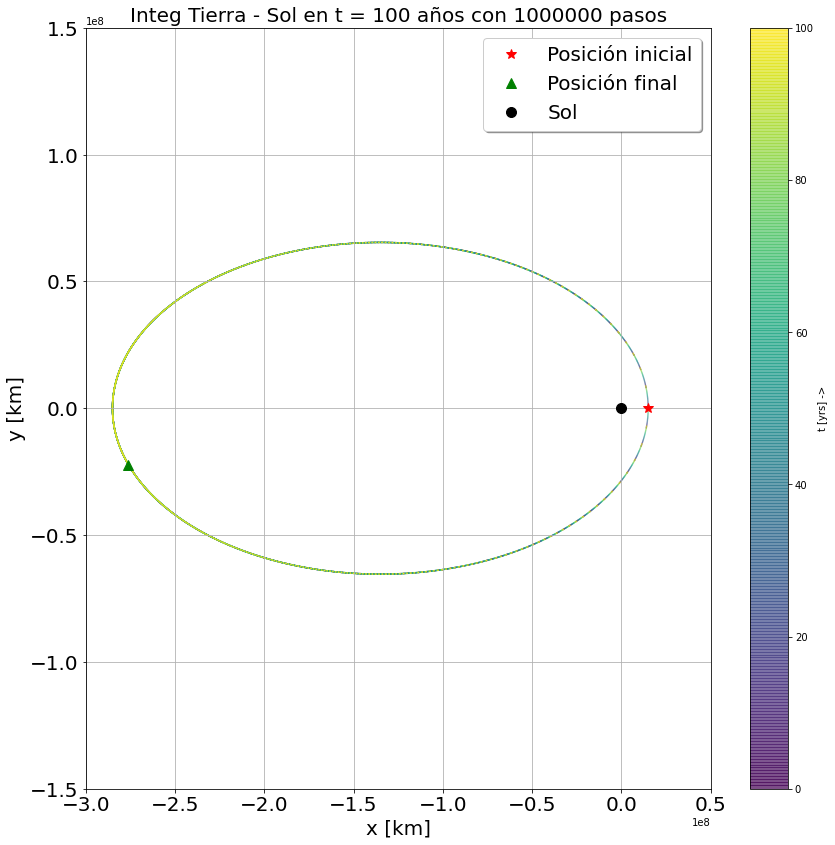

In [8]:
t = np.linspace(0,100,n//100)

plt.figure(figsize=(14,14))
plt.xlabel('x [km]',fontsize=20)
plt.ylabel('y [km]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-3e+8,0.5e+8)
plt.ylim(-1.5e+8,1.5e+8)
plt.title(f'Integ Tierra - Sol en t = 100 años con {n} pasos',fontsize=20)
orb = plt.scatter([P[0][100*i] for i in range(int(n/100))],[P[1][100*i] for i in range(int(n/100))],marker='.',s=1,alpha=0.7,c=t)
plt.colorbar(orb,ticks=None,label='t [yrs] ->')
#Lo pusimos así como para sólo plottear cada 100 steps
plt.plot(x[0],y[0],'*r',markersize=10,label='Posición inicial')
plt.plot(P[0][-1],P[1][-1],'^g',markersize=10,label='Posición final')
plt.plot(0,0,'ok',markersize=10,label='Sol')
plt.legend(shadow=True,fontsize=20)
plt.grid(True)

Lo que vemos es muchísimo menos *drift*, por eso en los mismos puntos hay colores oscuros (comienzo de la integración) y claros. Veamos la energía:

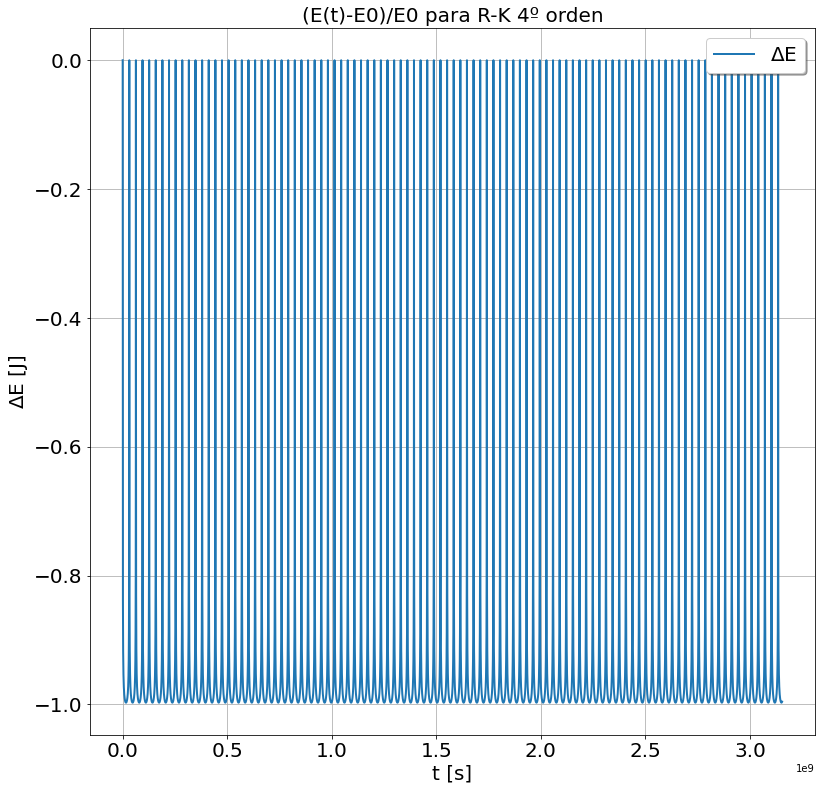

In [9]:
plt.figure(figsize=(13,13))
plt.xlabel('t [s]',fontsize=20)
plt.ylabel('$\Delta$E [J]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('(E(t)-E0)/E0 para R-K 4º orden',fontsize=20)
plt.plot([h*i for i in range(n)],P[2],label='$\Delta$E',lw=2)
plt.legend(shadow=True,fontsize=20)
plt.grid(True)

*Esto me resulta extraño, muy difícil que la variación de la energía sea igual, dado a que LF es una transf simpléctica y R-K no...*

## 46)
Integremos el movimiento de 3 partículas con posiciones y velocidades iniciales conocidas (movimiento 2-D) con el método **LF-KDK**:

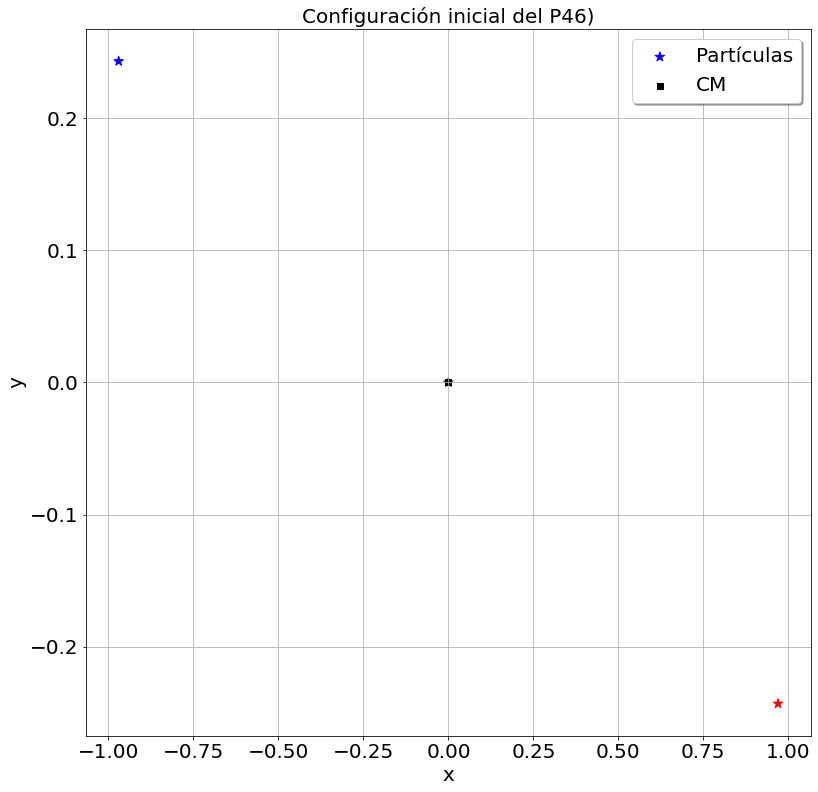

In [10]:
from numpy import linalg as LA

x = np.array([-0.97000436,0.97000436,0])
y = np.array([0.24308753,-0.24308753,0]) #tengo 2 arrays x,y de posiciones de las 3 partículas

#Grafiquémoslas

plt.figure(figsize=(13,13)) #para activar una figura más grande
plt.scatter(x,y,color=['b','r','g'],s=100,label='Partículas',marker='*') #grafiquemos la posición de los puntos generados
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.grid(True)

#dibujemos el CM de la distrib ("centro geométrico", porque M_i = 1):

plt.scatter(np.mean(x),np.mean(y),color='k',marker='s',s=30,label='CM')
plt.title('Configuración inicial del P46)',fontsize=20)
plt.legend(shadow=True,fontsize=20);

In [11]:
#Definamos la aceleración y el integrador:

def a(x=x,y=y,n=3,e=0.001): #aceleración de cada partícula debido al resto (sup G = 1)
                           #e=softening (al pedo, pero lo dejo igual), n = cant de part, debe ser = al n de distrib
        
    ax = np.empty(n)
    ay = np.empty(n)
    
    for i in range(n):
        
        Sx = 0 #Var para sum. Para c/ part debo ver cómo le afectan las demás
        Sy = 0 #Direcc ortog => lo puedo cal por separado
        
        for j in range(n):
            if i == j:
                continue
            else:
                r = LA.norm((x[i]-x[j],y[i]-y[j])) #módulo del vector dif entre particulas i y j
                Sx += (r**2 + e**2)**-1.5 * (x[i]-x[j])
                Sy += (r**2 + e**2)**-1.5 * (y[i]-y[j])
    
        ax[i] = -Sx
        ay[i] = -Sy #numpy no me deja hacer arrays de arrays, así que div ax de ay
        
    return ax,ay #a = un array de n listas (= cant de aprticulas), con las aceleraciones en x y en y de cada espacio

def LF(a=a,x=x,y=y,vx=0,vy=0,n=10_000,t=10,N=3): 
            #(x,y) listas vacías excepto por las pos inic, (vx,vy) variables, pero comenzamos con las v inic.
            # a = (ax,ay) func para obtener la aceleración; n = cant de pasos; t = tiempo de integ
            # N = cant de part = n anteriores    
    kx = np.empty(N)
    ky = np.empty(N)
    vx = np.array([-0.93240737/2,-0.93240737/2,0.93240737])
    vy = np.array([-0.86473146/2,-0.86473146/2,0.86473146]) #v inic, estos se van a ir sobreescribiendo
    
    h = t/n
    
    for m in range(n): #pasos a realizar
        
        for i in range(N): #cant de partículas
        
            kx[i] = vx[i] + a(x,y)[0][i]*h/2 #la func a se come las posiciones de todas las partículas, pero
                                             #siempre estoy viendo la particula i, y actualizo las pos y vel de cada part a la vez
                                             #antes de saltar al prox step m
            ky[i] = vy[i] + a(x,y)[1][i]*h/2
            
        for i in range(N): #Debo ir actualizando k, x y v de todas las part antes de pasar al prox parám (k -> x -> v) 

            x[i] = x[i] + kx[i]*h
            y[i] = y[i] + ky[i]*h
            
        for i in range(N):

            vx[i] = kx[i] + a(x,y)[0][i]*h/2 #Esta a es con las pos de TODAS las part actualizadas (no sólo de 1, que es lo que
                                             # pasaría si estuvieran k, x y v en el mismo loop)
            vy[i] = ky[i] + a(x,y)[1][i]*h/2
        
        #Y ahora si podemos pasar al prox step, guardando imags para la prox anim
        
        if m % 200 == 0:
            fig = plt.figure(figsize=(13,13))
            plt.scatter(x,y,color='b',marker='*',s=30)
            plt.scatter(np.mean(x),np.mean(y),color='k',marker='s',s=20,label='CM')
            plt.xlim(-3,3)
            plt.ylim(-3,3)
            plt.grid(True)
            plt.legend()
            plt.savefig('Distrib_Pts'+str(m)+'.jpg',dpi=150,bbox_inches='tight')
            plt.close(fig) #Para no hacer display de las imags
            
    return x,y

No vamos a ejecutar la integración aquí. El video está subido a la página

https://drive.google.com/file/d/15m_BDp_tUIUOuAmwgqK_Hu3fMa08-xDD/view?usp=sharing